# 01 LINEAR REGRESSION WITH MULTIPLE VARIABLES

## Table data example:
![Title](https://i.stack.imgur.com/K7Cx0.png)
** Always add the X<sub>0</sub> column with zeros as features.

- X1 ... Xn: as the variables number.
- n: as the number of variables
- X1<sup>1</sup> ... X1<sup>m</sup> as the features
- m: as the number of this features.

## Equations:

### Lineal hypothesis:
\begin{align*}
h_\theta(x) = \theta^t x = \theta_0·X_0 + \theta_1·X_1 + \theta_2·X_2 + ... + \theta_n·X_n
\end{align*}

### Quadratic hypothesis

\begin{align}
h_\theta(x) = \theta_0 + \theta_1x_0 + \theta_1x_1 + \theta_2 x_0^2 + \theta_2 x_1^2
\end{align}

### Cost Function:
\begin{align}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2
\end{align}

### Gradient descent:
\begin{align*}
\theta_j:= \theta_j - \alpha·\frac{1}{m}\ \sum_{m=1}^{\infty} (\theta(X^i) - y^i)^2 ·X_j^i
\end{align*}
** for all j

## Example:


1. Graphing the data

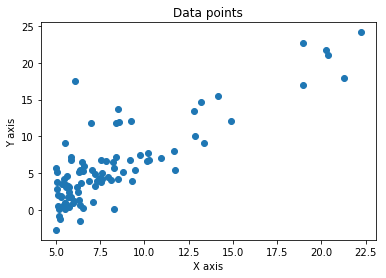

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
# =============================================================================
# =========================== INSERT YOUR CODE BELOW ===========================
# =============================================================================

#Load data
data = pd.read_csv(r'_data/ex1data1.txt', header=None, names=['x', 'y'])

#Plot data
plt.plot(data.x, data.y, 'o')
plt.title('Data points')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

#variables calculation
m = len(data.x)
theta = np.array([0, 0])
vector_x = np.array([[1]*len(data.x), data.x]).transpose()
vector_y = np.array(data.y)

2. Initial cost function calculation

In [9]:
#Cost function calculation
def costfunc(vec_x, vec_y, theta, m):
    hypothesis = vec_x.dot(theta.transpose())
    error = (hypothesis-vec_y)
    cost = 1/(2*m) * np.sum(error**2)
    return cost, error

#output
cost = costfunc(vector_x,vector_y , theta, m)
print('The initial cost for theta {} is J = {}'.format(theta,cost[0]))

The initial cost for theta [0. 0.] is J = 0.0


3. Gradient descent calculation

Cost Function graph with Alpha = 0.01 doing 200 loops


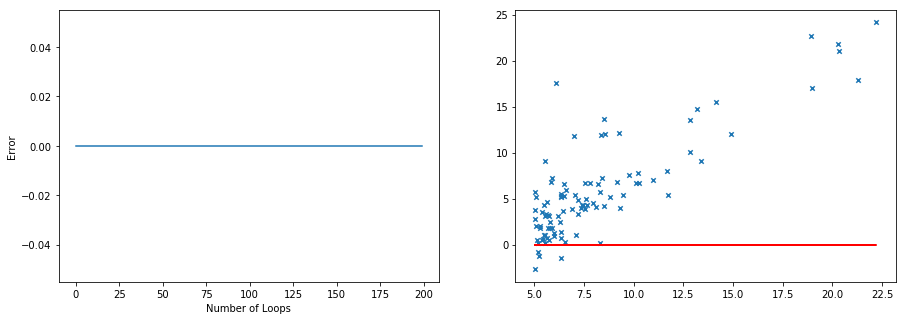

()
The final error is 0.0
()
THE FINAL THETA IS [0. 0.]


In [11]:
#Number of iterations
cycles = 200
alpha = 0.01

#Gradient descent
cost_h = []
for i in range(cycles):
    costf = costfunc(vector_x, vector_y, theta, m)
    cost = costf[0]
    cost_h.append(cost)
    error = costf[1]
    theta_0 = theta[0] - alpha*(1/m)*np.sum(error)
    theta_1 = theta[1] - alpha*(1/m)*np.sum(error*vector_x[:, 1])
    theta = np.array([theta_0, theta_1])

y_sol = [theta[0] + theta[1]*x for x in data.x]

#Plot cost function
print('Cost Function graph with Alpha = {} doing {} loops'.format(alpha, cycles))
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(list(range(cycles)), cost_h)
plt.xlabel('Number of Loops')
plt.ylabel('Error')

#Plot Line
plt.subplot(1, 2, 2)
plt.plot(data.x, y_sol, color = 'red')
plt.scatter(data.x, data.y,marker='x', s=20)


plt.show()
print()
print('The final error is {}'.format(cost))
print()
print('THE FINAL THETA IS {}'.format(theta))

# 02 LOGISTIC REGRESSION CLASSIFICATION

## Table data example:

![LogisticTable](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/7bde8445f0b69af569406cfd78801e8be0deefc0/2-Table1-1.png)

## Equations

### Sigmoid hypothesis

\begin{align}
h_\theta(x) = g(\theta^t x) = \frac{1}{1+ \mathrm e^{-\theta^Tx}}
\end{align}

\begin{align}
h_\theta(x) = P(y=1 | x;\theta)
\end{align}

![sigmoid](https://www.researchgate.net/profile/Tali_Leibovich-Raveh/publication/325868989/figure/fig2/AS:639475206074368@1529474178211/A-Basic-sigmoid-function-with-two-parameters-c1-and-c2-as-commonly-used-for-subitizing.png)

\begin{align}
g(z) \geq 0.5\\WHEN: z(x) \geq 0
\end{align}

### None-linear decision boundaries

\begin{align}
h\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2)
\end{align}

### Cost function

\begin{align}
cost(h_\theta(x), y) = 
\begin{cases}
-log(h_\theta(x))\hspace{0,5cm}if y=1\\
\\-log(1-h_\theta (x)) \hspace{0,5cm}if y = 0
\end{cases}
\end{align}

\begin{align}
cost(h_\theta(x), y) = -ylog(h_\theta(x)) - (1-y)log(1-h_\theta (x))
\end{align}

\begin{align}
J(\theta) = \frac{1}{m} \sum_{i=1}^{m}Cost(h_\theta(x^{(i)}, y^{i)})\\
J(\theta) = -\frac{1}{m}[\sum_{i=1}^my^{(i)}logh_\theta(x^{(i)}) + (1-y^{i})·log(1-h_\theta(x^{(i)})]
\end{align}

### Gradient descent

Gradient formula:
\begin{align}
\frac{\delta(\theta)}{\delta\theta_j} = \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i))}-y^{(i)})·x_j^i
\end{align}

Gradient descent
\begin{align}
min_\theta J(\theta):\\
\end{align}
\begin{align}
Repeat \{\\
\theta_j:= theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})·x_j^{(i)}\\
\}
\end{align}

### Decision boundary

![decision](https://miro.medium.com/max/452/1*wAIEsN7iLVclhoYJpCifjw.png)
\begin{align}
    when: h(x) = 0\\
    g(z) = 0.5\\
    \\
h(x) = \theta_0 + \theta_1·x_1 + \theta_2·x_2 = 0
\end{align}

## Example

1. Graphing data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
# =============================================================================
# =========================== INSERT YOUR CODE BELOW ===========================
# =============================================================================

#Load data
data = pd.read_csv(r'_data\ex2data1.txt', header=None, names=['x', 'x1', 'y'])
datay0 = data.where(data.y == 0).dropna()
datay1 = data.where(data.y == 1).dropna()

#Printed data
print(data.head())

#Plot data
plt.scatter(datay0.x, datay0.x1, marker = 'x', color='red', label ='Not Admitted')
plt.scatter(datay1.x, datay1.x1, marker = 'o', color='green', label='Admitted')
plt.title('Second Exam')
plt.xlabel('First exam')
plt.ylabel('Y axis')
plt.legend()
plt.show()

2. Initial cost function calculation

In [ ]:
import math as mt

#variables calculation
m = len(data.x)
theta = np.zeros((3,1))
vector_x = np.array([[1]*len(data.x), data.x, data.x1]).transpose()
vector_y = np.array(data.y)[np.newaxis].T

#Cost function calculation
def sigmoid(lst):
    sigmoid = lambda x: 1/(1+mt.e**(-x))
    output = np.array([sigmoid(i) for i in lst])
    return output

def costfunc(vec_x, vec_y, theta, m):
    hx = vec_x.dot(theta)
    gx = sigmoid(hx)
    cost = vec_y * np.log(gx) + (1-vec_y) * np.log(1-gx)
    fcost = - (1/m) * np.sum(cost)
    return fcost, gx

#output
cost = costfunc(vector_x,vector_y , theta, m)
print('The initial cost for theta {} is J = {}'.format(theta.T,cost[0]))

3. Gradient Descent

In [ ]:
#Number of iterations
cycles = 5000
alpha = 0.001068
theta = np.array([-1, 0, 0])[np.newaxis].T

#Variables
cost_h = []
theta_0 = theta[0]
theta_1 = theta[1]
theta_2 = theta[2]

#Gradient descent
for i in range(cycles):
    cost = costfunc(vector_x, vector_y, theta, m)
    cost_h.append(cost[0])
    gx = cost[1]
    theta_0 = theta_0 - alpha * 1/m * np.sum((gx-vector_y)*vector_x[:, 0][np.newaxis].T)
    theta_1 = theta_1 - alpha * 1/m * np.sum((gx-vector_y)*vector_x[:, 1][np.newaxis].T)
    theta_2 = theta_2 - alpha * 1/m * np.sum((gx-vector_y)*vector_x[:, 2][np.newaxis].T)
    theta = np.array([theta_0, theta_1, theta_2])

#Otuput
print('The final error is {}'.format(cost_h[-3:]))
print()
print('THE FINAL THETA IS {}'.format(theta.T))
print()
print('The minimum error found with 300k cycles and alpha = 0.001068 is J = 0.27582976320910635')
print('And the final theta is: ')
theta = np.array([-9.78506335, 0.08377175, 0.0775022])[np.newaxis].T
print(theta.T)

4. Algorithm trial

In [ ]:
#Original hypothesis
eq = lambda x, y: sigmoid(theta[0] + x*theta[1] + y*theta[2])

#Select a point by index to know the y
index = 4
y = eq(vector_x[index, 1], vector_x[index, 2])

#Outputs
print('hypothesis theta = {}, {}, {}'.format(theta[0], theta[1], theta[2]))
print()
print('With this hypothesis the point P(x1, x2) = ({}, {}) would have a y = {}'.format(vector_x[index, 1], vector_x[index, 2], y))

In [ ]:
#Resolving equation for two points
theta.flatten()
x_pts = []
y_pts = []
##If x2 = 0
y_pts.append(0)
x1 = -theta[0]/theta[1]
x_pts.append(x1)
##If x1 = 0
x_pts.append(0)
y2 = -theta[0]/theta[2]
y_pts.append(y2)

#Plot cost function
print('Cost Function graph with Alpha = {} doing {} loops'.format(alpha, cycles))
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(list(range(cycles)), cost_h)
plt.xlabel('Number of Loops')
plt.ylabel('Error')

#Plot Line
plt.subplot(1, 2, 2)
plt.scatter(datay0.x, datay0.x1, marker = 'x', color='red', label ='Not Admitted')
plt.scatter(datay1.x, datay1.x1, marker = 'o', color='green', label='Admitted')
plt.plot(x_pts, y_pts)
plt.title('Decision boundary test')
plt.xlabel('First test')
plt.ylabel('Second test')
plt.legend()

plt.show()

# 03 LOGISTIC REGRESSION MULTICLASS

In [ ]:
from scipy.io import loadmat
x = loadmat(r'_data\ex3data1.mat')

# 04 NEURAL NETWORKS

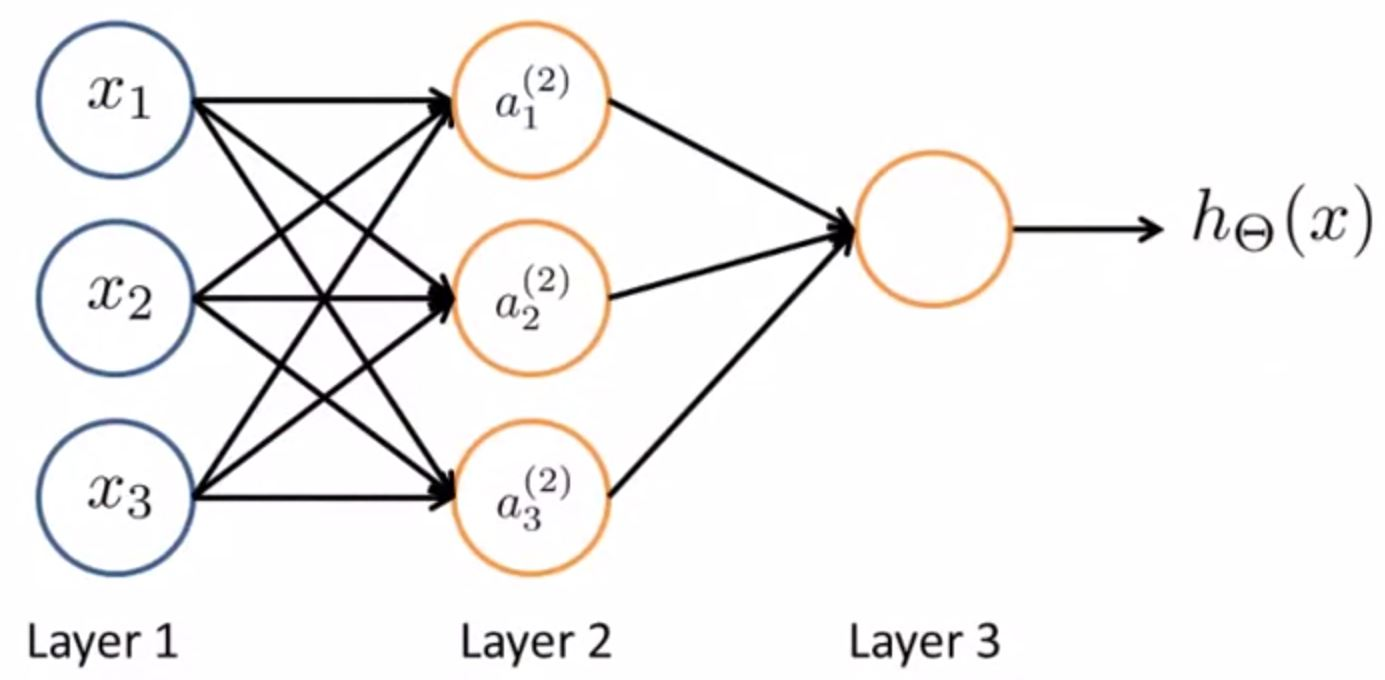

## Equations

 ### Forward propagation

 #### Hiden layer:

\begin{align}
a_1^{(2)} = g(z_1^{(2)}) = g(\theta_{10}^{(1)}·x_0 + \theta_{11}^{(1)}·x_1 + \theta_{12}^{(1)}·x_2 + \theta_{13}^{(1)}·x_3)\\
a_2^{(2)} = g(z_2^{(2)}) = g(\theta_{20}^{(1)}·x_0 + \theta_{21}^{(1)}·x_1 + \theta_{22}^{(1)}·x_2 + \theta_{23}^{(1)}·x_3)\\
a_3^{(2)} = g(z_3^{(2)}) = g(\theta_{30}^{(1)}·x_0 + \theta_{31}^{(1)}·x_1 + \theta_{32}^{(1)}·x_2 + \theta_{33}^{(1)}·x_3)
\end{align}

 #### Output layer:

\begin{align}
h_\theta(x) = g(z_1^{3}) = g(\theta_{10}^{(2)}·a_0^{(2)} + \theta_{11}^{(2)}·a_1^{(2)} + \theta_{12}^{(2)}·a_2^{(2)} + \theta_{13}^{(2)}·a_3^{(2)})
\end{align}

### Cost function

Logistic regression regularization
\begin{align}
J(\theta) = -\frac{1}{m}[\sum_{i=1}^m y^{(i)}\log h_\theta(x^{(i)})+(1-y^{(i)})\log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2
\end{align}

Neural network regularization

\begin{align}
J(\theta) = -\frac{1}{m}[\sum_{i=1}^m\sum_{k=1}^m y_k^{(i)}\log h_\theta(x^{(i)})_k+(1-y_k^{(i)})\log(1-(h_\theta(x^{(i)}))_k)] + \frac{\lambda}{2m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_l+1}(\theta_{ji}^{(l)})^2
\end{align}

### Backpropagation